# Group Project - Proposal

### Group members:
* Audrey Wang 41935289
* Sam Shan 85179604
* Dima Zubkovskii
* Michelle Sui


### Tasks:

* Import data into R
* Clean and wrangle data into a tidy format
* Separate data into training data and test data
* Summarize the training data in tables
    * The number of observations in each class
    * The means of the predictor variables you plan to use in your analysis and 
    * How many rows have missing data
* Visualize the training data
* Further analysis
    * Impact/significance
    * Future questions
* File preparation: HTML, ipynb

# Introduction

Diabetes is a chronic (long-lasting) health condition that affects how body turns food into energy. Body breaks down most of the food people eat into sugar (glucose) and releases it into the bloodstream. When the blood sugar goes up, it signals the pancreas to release insulin. Insulin acts like a key to let the blood sugar into the body’s cells for use as energy. However, with diabetes, patient's body doesn’t make enough insulin or can’t use it as well as it should. Moreover, gestational diabetes develops in pregnant women who have never had diabetes. If a patient have gestational diabetes, their baby could be at higher risk for health problems. Gestational diabetes usually goes away after your baby is born. However, it increases a patient's risk for type 2 diabetes later in life. (Center for Disease Control and Prevention, 2023) 

Early diagnosis and intervention can significantly alter the course of this disease, improving the quality of life for those affected. Recognizing the critical role of timely and accurate diagnostics, our project is inspired by a dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. This data provides a unique opportunity to utilize machine learning for predictive analysis in a medical context.
The dataset focuses on a specific subset of the population - women of Pima Indian heritage who are 21 years or older. It includes several medical predictor variables alongside one target variable, Outcome, indicating the presence or absence of diabetes. Our project aims to leverage the capabilities of artificial intelligence and data analytics to **develop a robust model that can predict the onset of diabetes in patients based on the diagnostic measurements provided in the dataset.** By doing so, we seek not only to contribute to the advancement of medical diagnostics but also to support preventive health measures among high-risk populations.



# Preliminary exploratory data analysis

## Read and import dataset from the web

In [53]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)

In [38]:
URL <- "https://raw.githubusercontent.com/audrey-rw5683/dsci-100-2023w2-group-002-2/main/diabetes.csv"
diabetes_data <- read_csv(URL)
head(diabetes_data)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


## Data description

* pregnancies: the number of pregnancies
* glucose: the plasma glucose concentration
* blood_pressure: diastolic blood pressure in mm/Hg
* skin_sickness: triceps skinfold thickness in mm
* insulin: insulin in U/mL
* bmi: the body mass index in kg/m2
* diabetes_pedigree_function: the function which scores likelihood of diabetes based on family history
* age: the age of the person
* outcome: if the patient had a diabetes or not (1 = yes, 0 = no)

### Clean and wrangle the data into a tidy format

#### Set seed value

In [33]:
set.seed(123) #do not change the value.

In [34]:
# rename colunms to lowercase
diabetes_with_missing <- rename(diabetes_data,
                 pregnancies =  Pregnancies,
                 glucose = Glucose,
                 blood_pressure = BloodPressure,
                 skin_sickness = SkinThickness,
                 insulin = Insulin,
                 bmi = BMI,
                 diabetes_pedigree_function = DiabetesPedigreeFunction,
                 age = Age,
                 outcome = Outcome)
# we will be working with outcome as a categorical variable, we will convert it to a factor using the function as_factor.
diabetes_with_missing <- diabetes_with_missing |>
    mutate(outcome = as_factor(outcome))

head(diabetes_with_missing)

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


#### Deal with missing values


In [36]:
diabetes <- diabetes_with_missing |>
    filter(glucose != 0, blood_pressure != 0, skin_sickness != 0, insulin != 0, bmi != 0, age !=0)
diabetes

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
3,78,50,32,88,31.0,0.248,26,1
2,197,70,45,543,30.5,0.158,53,1
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
0,118,84,47,230,45.8,0.551,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1


### Slipt the data
* We will use 80% of the data for training and 20% for testing.

In [43]:
diabetes_split <- initial_split(diabetes, prop = 0.8, strata = outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)
glimpse(diabetes_train)
glimpse(diabetes_test)

Rows: 313
Columns: 9
$ pregnancies                <dbl> 1, 3, 1, 13, 3, 4, 3, 1, 1, 5, 7, 1, 5, 4, …
$ glucose                    <dbl> 103, 126, 97, 145, 88, 103, 180, 103, 101, …
$ blood_pressure             <dbl> 30, 88, 66, 82, 58, 60, 64, 80, 50, 66, 66,…
$ skin_sickness              <dbl> 38, 41, 15, 19, 11, 33, 25, 11, 15, 21, 42,…
$ insulin                    <dbl> 83, 235, 140, 110, 54, 192, 70, 82, 36, 23,…
$ bmi                        <dbl> 43.3, 39.3, 23.2, 22.2, 24.8, 24.0, 34.0, 1…
$ diabetes_pedigree_function <dbl> 0.183, 0.704, 0.487, 0.245, 0.267, 0.966, 0…
$ age                        <dbl> 33, 27, 22, 57, 22, 33, 26, 22, 26, 30, 42,…
$ outcome                    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 79
Columns: 9
$ pregnancies                <dbl> 1, 4, 0, 0, 2, 4, 15, 1, 0, 7, 3, 2, 0, 5, …
$ glucose                    <dbl> 89, 111, 100, 105, 141, 146, 136, 71, 95, 1…
$ blood_pressure             <dbl> 66, 72, 88, 64, 58, 85, 70, 48, 85, 54, 64,…

### Explore the dataset

In [47]:
num_obs <- nrow(diabetes_train)
diabetes_outcomes <- diabetes_train |>
                    group_by(outcome) |>
                    summarize(count = n(), percentage = n() / num_obs * 100)

diabetes_outcomes

outcome,count,percentage
<fct>,<int>,<dbl>
0,209,66.77316
1,104,33.22684


In [51]:
diabetes_stat <- diabetes_train |>
    summarize(across(pregnancies:age, mean))
diabetes_stat

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.329073,122.4345,70.44409,28.83067,154.3546,32.75719,0.5167891,30.79553


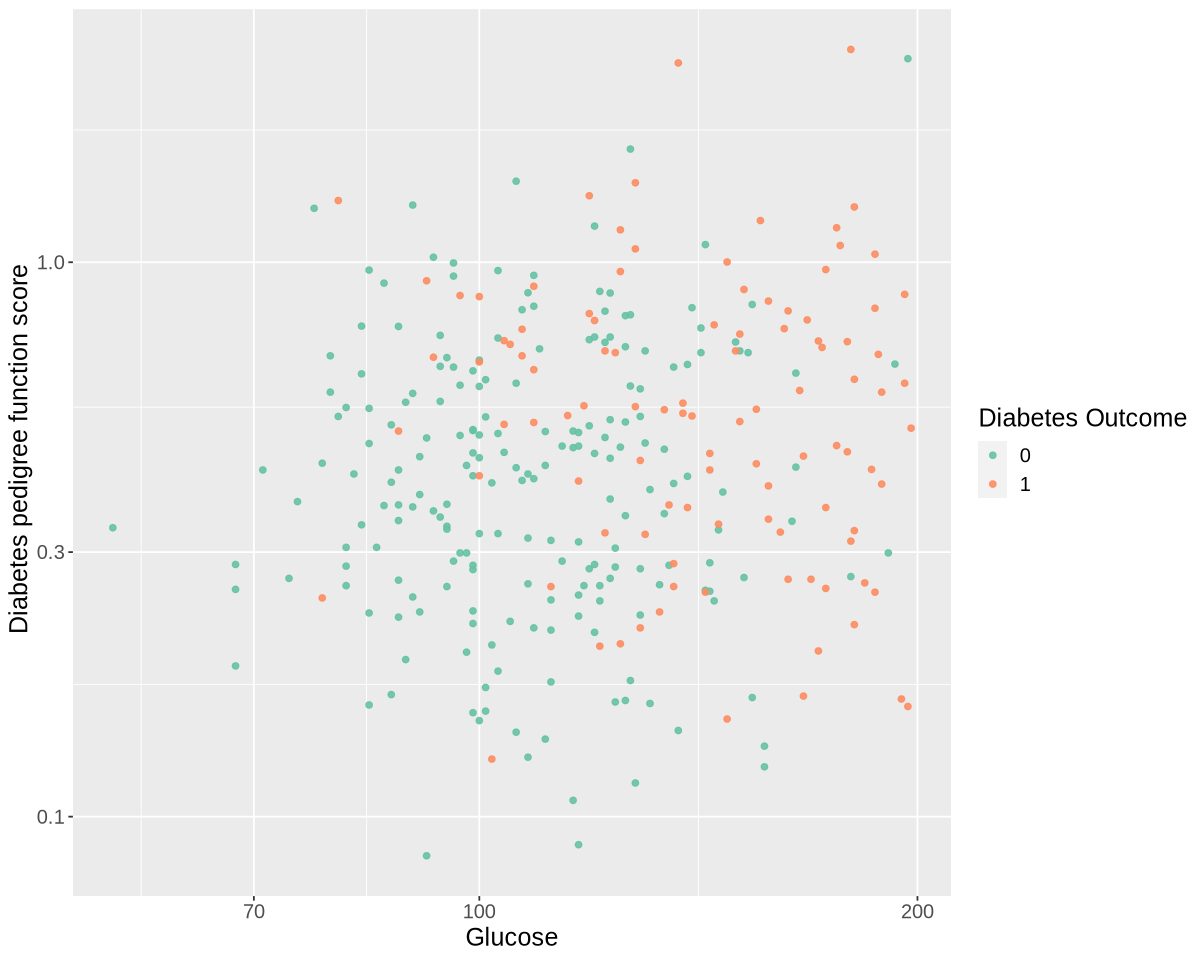

In [131]:
options(repr.plot.width=10, repr.plot.height=8)
plot1 <- ggplot(diabetes_train, aes(x = glucose, y = diabetes_pedigree_function, color = outcome)) +
            geom_point(alpha = 0.9) +
            scale_color_brewer(palette = "Set2") +
            theme(text = element_text(size = 15)) +
            scale_x_log10() +
            scale_y_log10() +
            labs(x = "Glucose", y = " Diabetes pedigree function score", color = "Diabetes Outcome")
plot1 

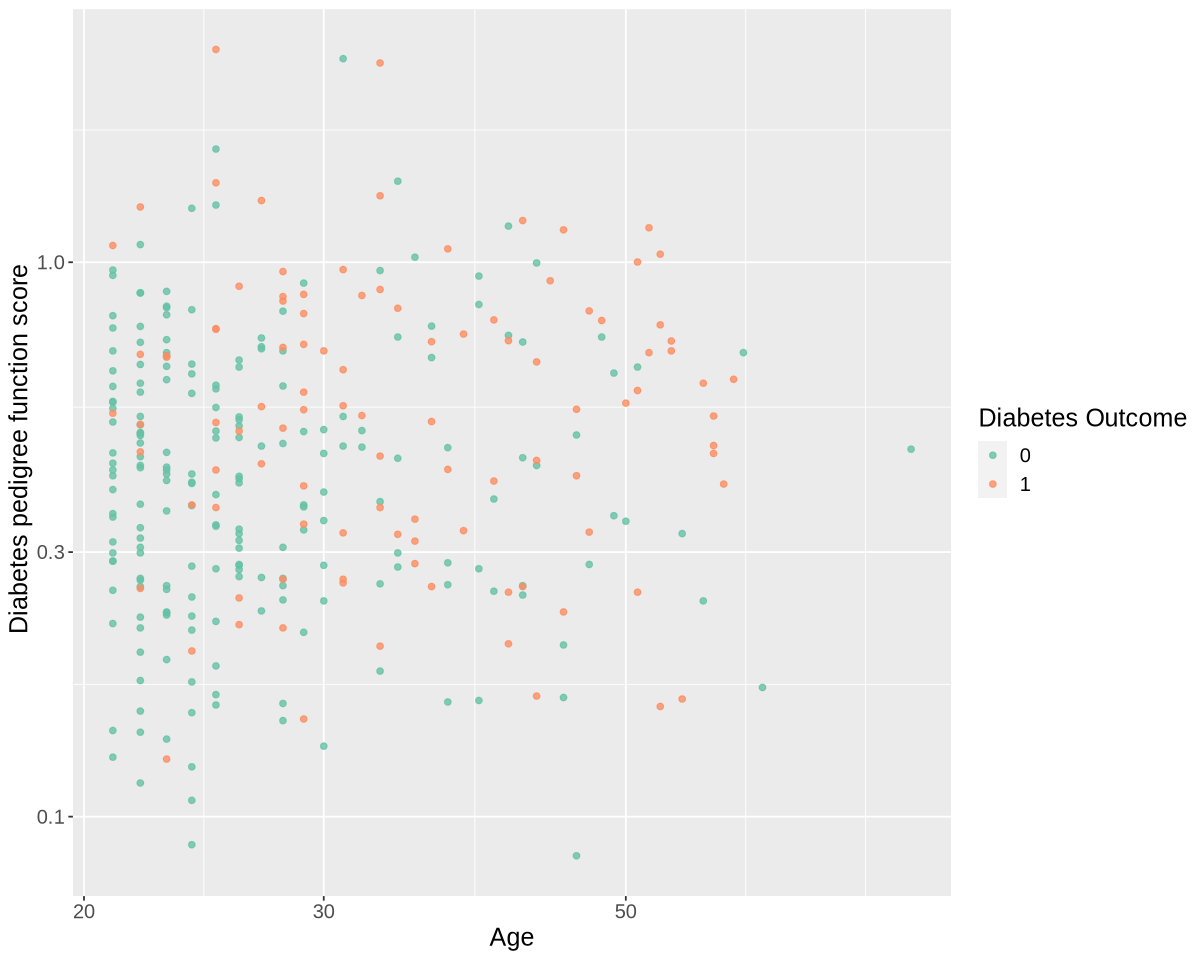

In [130]:
options(repr.plot.width=10, repr.plot.height=8)
plot2 <- ggplot(diabetes_train, aes(x = age, y = diabetes_pedigree_function, color = outcome)) +
            geom_point(alpha =0.8) +
            scale_color_brewer(palette = "Set2") +
            theme(text = element_text(size = 15)) +
            scale_x_log10()+
            scale_y_log10()+
            labs(x = "Age", y = " Diabetes pedigree function score", color = "Diabetes Outcome")
plot2

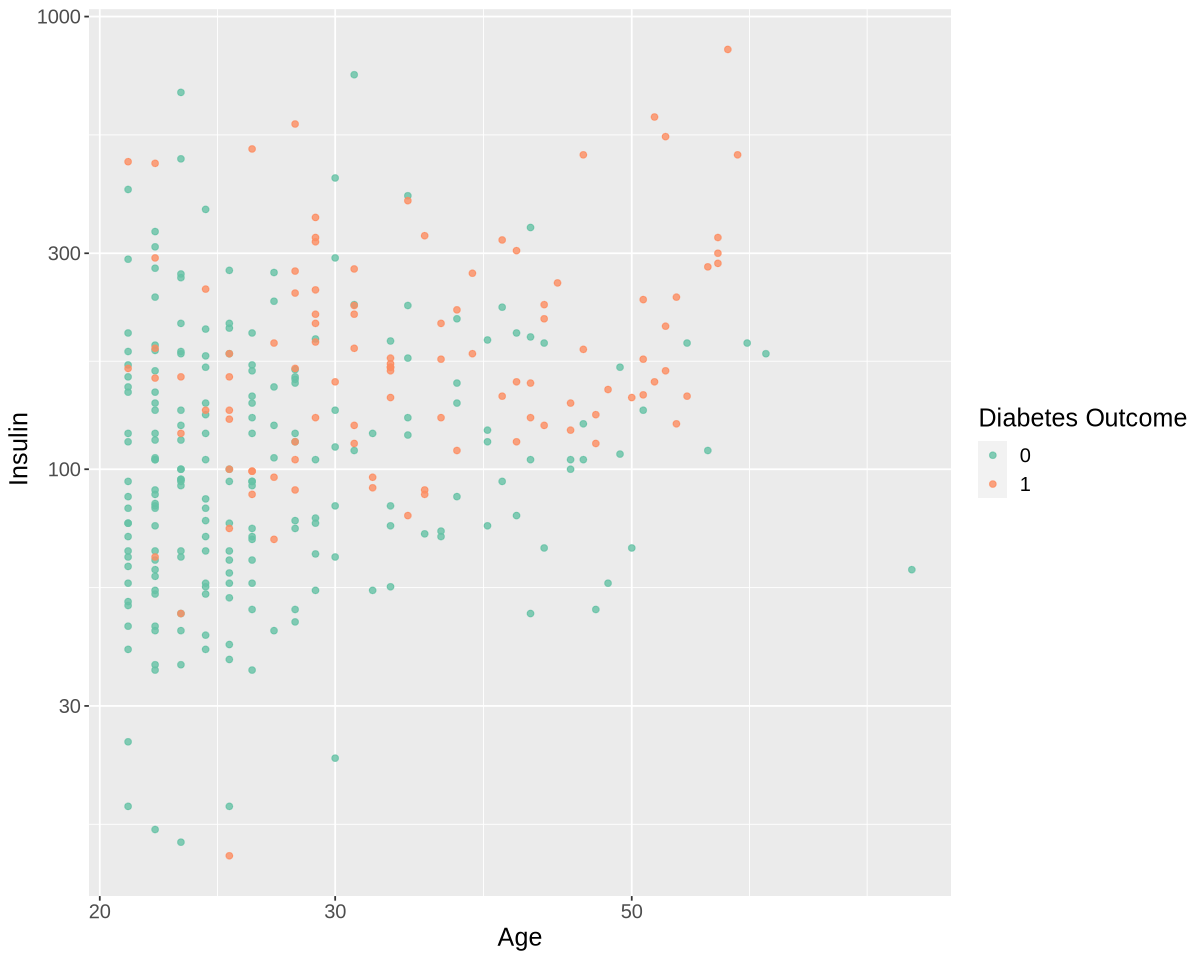

In [129]:
options(repr.plot.width=10, repr.plot.height=8)
plot3 <- ggplot(diabetes_train, aes(x = age, y =  insulin, color = outcome)) +
            geom_point(alpha =0.8) +
            scale_color_brewer(palette = "Set2") +
            theme(text = element_text(size = 15)) +
            scale_y_log10()+
            scale_x_log10()+
            labs(x = "Age", y = " Insulin", color = "Diabetes Outcome")
plot3

In [41]:
diabetes_pregancies_plot <- diabetes |>
   ggplot(aes(x = Pregnancies)) + 
   geom_histogram() +
   xlab("distribution of pregnancies")

diabetes_glucose_plot <- diabetes |>
   ggplot(aes(x = Glucose)) + 
   geom_histogram() +
   xlab("distribution of glucose") 

diabetes_bloodpressure_plot <- diabetes |>
   ggplot(aes(x = BloodPressure)) + 
   geom_histogram() +
   xlab("distribution of blood pressure levels")

diabetes_skinthickness_plot <- diabetes |>
   ggplot(aes(x = SkinThickness)) + 
   geom_histogram() +
   xlab("distribution of skin thickness") 

diabetes_insulin_plot <- diabetes |>
   ggplot(aes(x = Insulin)) + 
   geom_histogram() +
   xlab("distribution of insulin levels") 

diabetes_predigrees_plot <- diabetes |>
   ggplot(aes(x = DiabetesPedigreeFunction)) + 
   geom_histogram() +
   xlab("distribution of pregnancies") 

diabetes_age_plot <- diabetes |>
   ggplot(aes(x = Age)) + 
   geom_histogram() +
   xlab("distribution of pregnancies")


#diabetes_pregancies_plot
#diabetes_glucose_plot
#diabetes_bloodpressure_plot
#diabetes_skinthickness_plot
#diabetes_insulin_plot
#diabetes_predigrees_plot
#diabetes_age_plot

In [ ]:
# plotting the training data
plot1 <- ggpot(diabetes_train, aes(x = pregnancies,))